In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
#Loading the dataset
data= pd.read_csv("flightdata.csv")
pd.set_option('display.max_columns', None)
data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,14747,SEA,1905,1907.0,2.0,0.0,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,13487,MSP,1345,1344.0,-1.0,0.0,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,14747,SEA,940,942.0,2.0,0.0,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,13487,MSP,819,820.0,1.0,0.0,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,11433,DTW,2300,2256.0,-4.0,0.0,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [12]:
#Dropping unnecessary columns
data.drop('Unnamed: 25', axis = 1, inplace = True)

In [13]:
#Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [15]:
#Handling missing values
data.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [17]:
#Dropping the missing values
data.dropna(subset=['DEP_TIME','ARR_DELAY'], inplace = True)

In [18]:
data.isnull().sum()

YEAR                   0
QUARTER                0
MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
UNIQUE_CARRIER         0
TAIL_NUM               0
FL_NUM                 0
ORIGIN_AIRPORT_ID      0
ORIGIN                 0
DEST_AIRPORT_ID        0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
DEP_DEL15              0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
ARR_DEL15              0
CANCELLED              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
DISTANCE               0
dtype: int64

In [19]:
data.shape

(11043, 25)

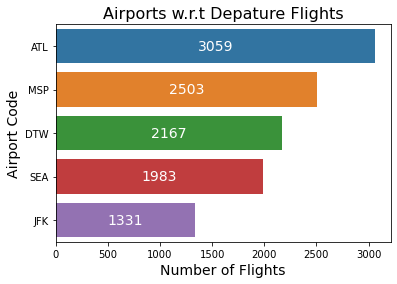

In [20]:
#Data Visualization
ax = sns.countplot(y = data['ORIGIN'], order = data['ORIGIN'].value_counts().index);
ax.set_title("Airports w.r.t Depature Flights", fontsize = 16);
ax.set_xlabel("Number of Flights", fontsize = 14);
ax.set_ylabel("Airport Code", fontsize = 14);
ax.bar_label(ax.containers[0], label_type = 'center', color = 'white', size = 14);

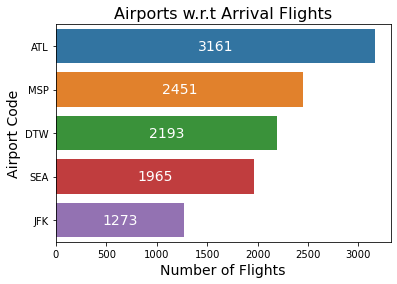

In [22]:
ax = sns.countplot(y = data['DEST'], order = data['DEST'].value_counts().index);
ax.set_title("Airports w.r.t Arrival Flights", fontsize = 16);
ax.set_xlabel("Number of Flights", fontsize = 14);
ax.set_ylabel("Airport Code", fontsize = 14);
ax.bar_label(ax.containers[0], label_type = 'center', color = 'white', size = 14);

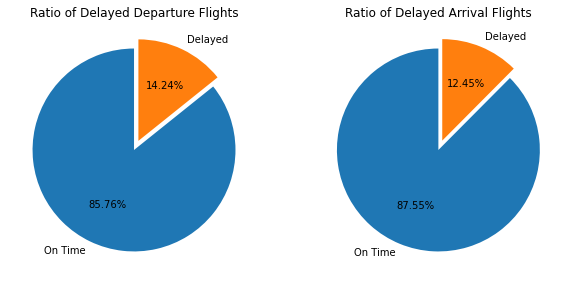

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (10,10))
ax[0].pie(data['DEP_DEL15'].value_counts(), labels = ['On Time', 'Delayed'], autopct = '%1.2f%%',startangle = 90, explode = (0,0.1));
ax[0].title.set_text("Ratio of Delayed Departure Flights");
ax[1].pie(data['ARR_DEL15'].value_counts(), labels = ['On Time','Delayed'], autopct = '%1.2f%%',startangle = 90, explode = (0,0.1));
ax[1].title.set_text("Ratio of Delayed Arrival Flights");

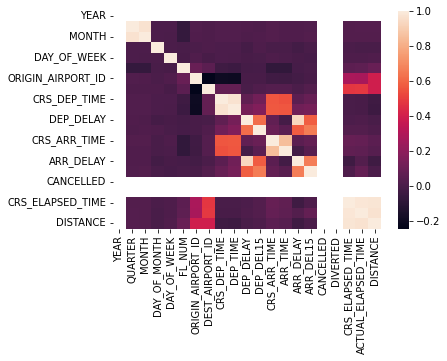

In [25]:
sns.heatmap(data.corr());

In [26]:
new_data = pd.get_dummies(data, columns = ['ORIGIN','DEST'])

In [27]:
new_data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,2016,1,1,1,5,DL,N836DN,1399,10397,14747,1905,1907.0,2.0,0.0,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,1,0,0,0,0,0,0,0,0,1
1,2016,1,1,1,5,DL,N964DN,1476,11433,13487,1345,1344.0,-1.0,0.0,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,0,1,0,0,0,0,0,0,1,0
2,2016,1,1,1,5,DL,N813DN,1597,10397,14747,940,942.0,2.0,0.0,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,1,0,0,0,0,0,0,0,0,1
3,2016,1,1,1,5,DL,N587NW,1768,14747,13487,819,820.0,1.0,0.0,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,0,0,0,0,1,0,0,0,1,0
4,2016,1,1,1,5,DL,N836DN,1823,14747,11433,2300,2256.0,-4.0,0.0,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,0,0,0,0,1,0,1,0,0,0


In [28]:
#Splitting into independant and dependant values
X = new_data[['MONTH','DAY_OF_MONTH','DAY_OF_WEEK','ORIGIN_ATL','ORIGIN_DTW','ORIGIN_JFK','ORIGIN_MSP','ORIGIN_SEA','DEST_ATL','DEST_DTW','DEST_JFK','DEST_MSP','DEST_SEA','CRS_DEP_TIME','DEP_TIME','DEP_DEL15','CRS_ARR_TIME']]
y = new_data['ARR_DEL15']

In [29]:
X.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA,CRS_DEP_TIME,DEP_TIME,DEP_DEL15,CRS_ARR_TIME
0,1,1,5,1,0,0,0,0,0,0,0,0,1,1905,1907.0,0.0,2143
1,1,1,5,0,1,0,0,0,0,0,0,1,0,1345,1344.0,0.0,1435
2,1,1,5,1,0,0,0,0,0,0,0,0,1,940,942.0,0.0,1215
3,1,1,5,0,0,0,0,1,0,0,0,1,0,819,820.0,0.0,1335
4,1,1,5,0,0,0,0,1,0,1,0,0,0,2300,2256.0,0.0,607


In [30]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ARR_DEL15, dtype: float64

In [31]:
X.shape

(11043, 17)

In [32]:
y.shape

(11043,)

In [33]:
#Splitting into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [34]:
#Model Building 
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier(max_depth = 4, min_samples_split = 4, random_state = 25)

In [35]:
#Model Training
dec.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=4, random_state=25)

In [36]:
pred = dec.predict(X_test)

In [37]:
#Model Evaluation
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.9145789314820404


In [38]:
dec.predict([[1,4,1,0,1,0,0,0,0,0,0,0,1,1215,1236,1,1420]])

C:\Users\vitta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1.])

In [40]:
from sklearn.linear_model import LinearRegression

FDPM=LinearRegression()

FDPM.fit(X_train,y_train)

LinearRegression()

In [41]:
pred=FDPM.predict(X_train)
pred

array([0.03469497, 0.03125788, 0.01958096, ..., 0.03564791, 0.04581356,
       0.08275568])

In [45]:
#Saving the model
import pickle
pickle.dump(dec, open('flightdec.pkl','wb'))

In [46]:
pwd

'C:\\Users\\vitta\\FDP model\\Dataset'